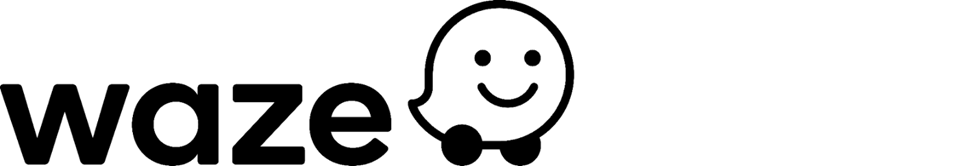


# Project goal: 

Waze leadership has asked your data team to develop a machine learning model to predict user churn. An accurate model will help prevent churn, improve user retention, and grow Waze’s business.

# Background: 

Waze’s free navigation app makes it easier for drivers around the world to get to where they want to go. Waze’s community of map editors, beta testers, translators, partners, and users helps make each drive better and safer. 

# Scenario: 

Your team is about to start a new project to help prevent user churn on the Waze app. Churn quantifies the number of users who have uninstalled the Waze app or stopped using the app. This project focuses on monthly user churn.

The subject of this Case Study is to answer the following questions:

- Who are the users who most likely churn?

- Why do users churn?

- When do users churn?


# Note:
 The story, all names, characters, and incidents portrayed in this project are fictitious. No identification with actual persons (living or deceased) is intended or should be inferred. And, the data shared in this project has been created for pedagogical purposes.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
pd.set_option('display.Max_columns',None)

In [2]:
df=pd.read_csv('waze_dataset.csv')

In [3]:
df.shape

(14999, 13)

In [4]:
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


In [8]:
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


In [5]:
df['label'].value_counts(dropna=False)

label
retained    11763
churned      2536
NaN           700
Name: count, dtype: int64

In [6]:
df.isnull().sum() #to check null values

ID                           0
label                      700
sessions                     0
drives                       0
total_sessions               0
n_days_after_onboarding      0
total_navigations_fav1       0
total_navigations_fav2       0
driven_km_drives             0
duration_minutes_drives      0
activity_days                0
driving_days                 0
device                       0
dtype: int64

In [31]:
df.groupby('label').median(numeric_only=True)

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_drive,km_per_driving_day,drives_per_driving_day
label,,,,,,,,,,,,,,
churned,7477.5,59.0,50.0,164.339042,1321.0,84.5,11.0,3652.655666,1607.183785,8.0,6.0,74.109416,697.541999,10.0000
retained,7509.0,56.0,47.0,157.586756,1843.0,68.0,9.0,3464.684614,1458.046141,17.0,14.0,75.014702,289.549333,4.0625


- Users who churned averaged ~3 more drives in the last month than retained users, but retained users used the app on over twice as many days as churned users in the same time period.

- The median churned user drove ~200 more kilometers and 2.5 more hours during the last month than the median retained user.

- It seems that churned users had more drives in fewer days, and their trips were farther and longer in duration. Perhaps this is suggestive of a user profile.

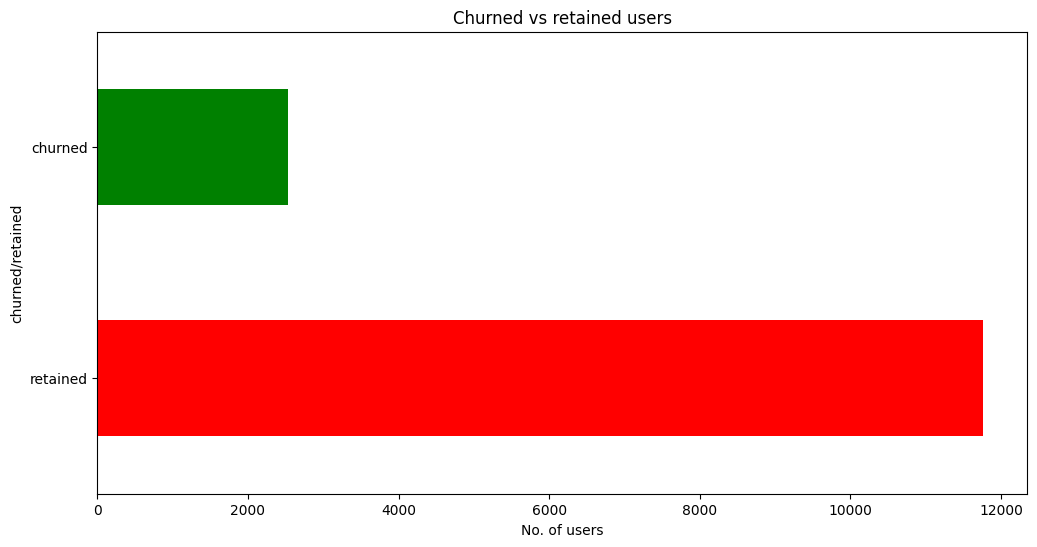

In [56]:
plt.figure(figsize=(12,6))

graph = df['label'].value_counts().plot(kind='barh',color=['r','g'])

plt.title('Churned vs retained users')
plt.xlabel('No. of users')
plt.ylabel('churned/retained')

plt.show()

- The dataset has 700 missing values in the label column. There was no obvious pattern to the missing values.
- The median user who churned drove 698 kilometers each day they drove last month, which is about 240% the per-drive-day distance of retained users. It would be helpful to know how this data was collected and if it represents a non-random sample of users.
Android users comprised approximately 36% of the sample, while iPhone users made up about 64%
Generally, users who churned drove farther and longer in fewer days than retained users. They also used the app about half as many times as retained users over the same period.
- The churn rate for both iPhone and Android users was within one percentage point of each other. There is nothing suggestive of churn being correlated with device.

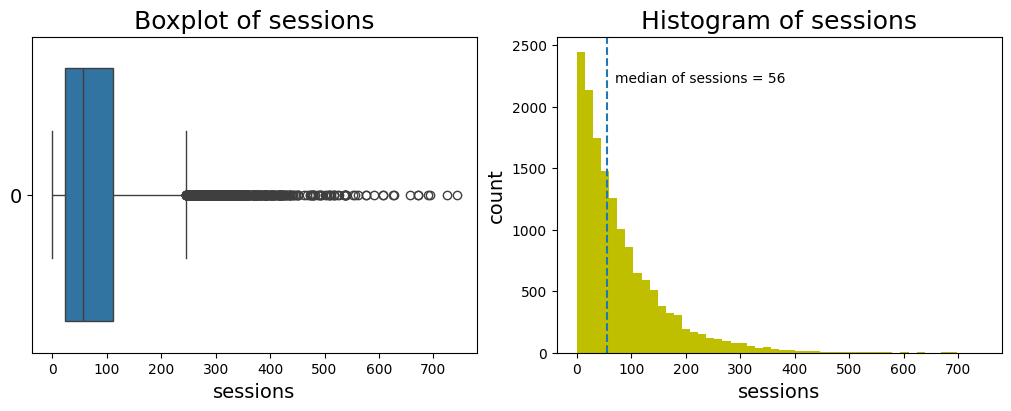

In [54]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), constrained_layout=True)

# Boxplot
sns.boxplot(data=df, x='sessions', ax=ax1)
ax1.set_xlabel("sessions", fontsize=14)
ax1.set_title('Boxplot of sessions', fontsize=18)
ax1.set_yticks(ax1.get_yticks())  # Ensure ticks are set first
ax1.set_yticklabels(ax1.get_yticks(), size=14)

# Histogram
median_sessions = np.median(df['sessions'])
ax2.hist(df['sessions'], bins=50, color='y')
ax2.axvline(median_sessions, ls="--", label="Median hour")
ax2.set_xlabel('sessions', fontsize=14)
ax2.set_ylabel('count', fontsize=14)
ax2.text(70, 2200, 'median of sessions = 56')
ax2.set_title('Histogram of sessions', fontsize=18)

plt.show()


- The sessions variable is a right-skewed distribution with half of the observations having 56 or fewer sessions. However, as indicated by the boxplot, some users have more than 700.

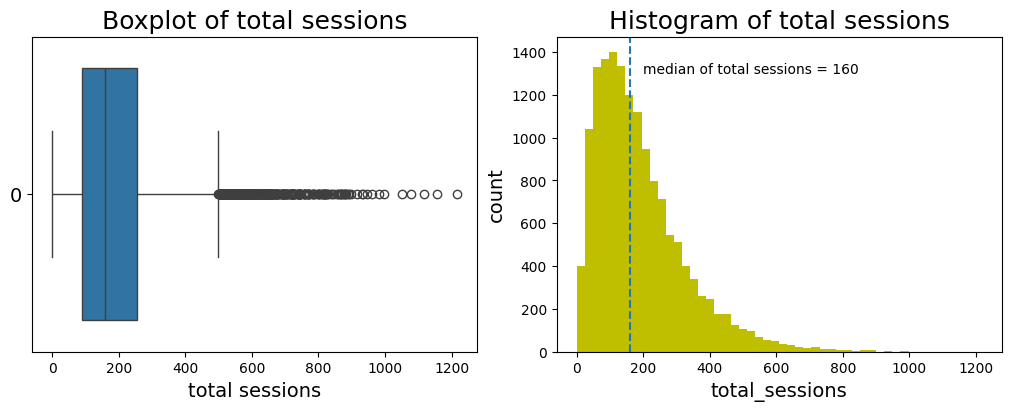

In [45]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4),constrained_layout = True)

ax1 = sns.boxplot(data=df,x='total_sessions',ax=ax1)
ax1.set_xlabel("total sessions",fontsize=14)
ax1.set_title('Boxplot of total sessions',fontsize=18)
ax1.set_yticks(ax1.get_yticks())  # Ensure ticks are set first
ax1.set_yticklabels(ax1.get_yticks(),size=14)

median_sessions = np.median(df['total_sessions'])
ax2 = plt.hist(df['total_sessions'],bins=50,color='y')
plt.axvline(median_sessions,ls="--",label="Median hour")
plt.xlabel('total_sessions',fontsize=14)
plt.ylabel('count',fontsize=14)
plt.text(200,1300,'median of total sessions = 160')
plt.title('Histogram of total sessions',fontsize=18);

- The total_sessions is a right-skewed distribution. The median total number of sessions is 159.6. This is interesting information because, if the median number of sessions in the last month was 56 and the median total sessions was ~160, then it seems that a large proportion of a user's (estimated) total drives might have taken place in the last month. This is something you can examine more closely later.

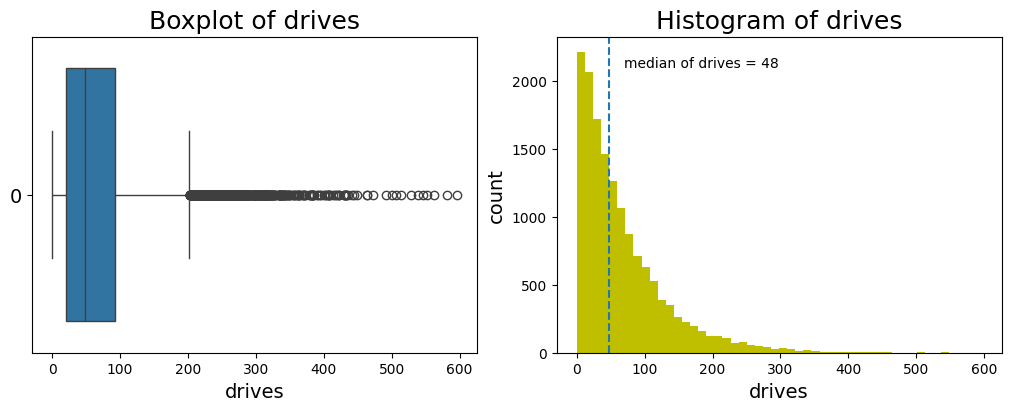

In [53]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4),constrained_layout = True)

ax1 = sns.boxplot(data=df,x='drives',ax=ax1)
ax1.set_xlabel("drives",fontsize=14)
ax1.set_title('Boxplot of drives',fontsize=18)
ax1.set_yticks(ax1.get_yticks())  # Ensure ticks are set first
ax1.set_yticklabels(ax1.get_yticks(),size=14)

median_drives = np.median(df['drives'])
ax2 = plt.hist(df['drives'],bins=50,color='y')
plt.axvline(median_drives,ls="--",label="Median hour")
plt.xlabel('drives',fontsize=14)
plt.ylabel('count',fontsize=14)
plt.text(70,2100,'median of drives = 48')
plt.title('Histogram of drives',fontsize=18);

- The drives information follows a distribution similar to the sessions variable. It is right-skewed, approximately log-normal, with a median of 48. However, some drivers had over 400 drives in the last month.

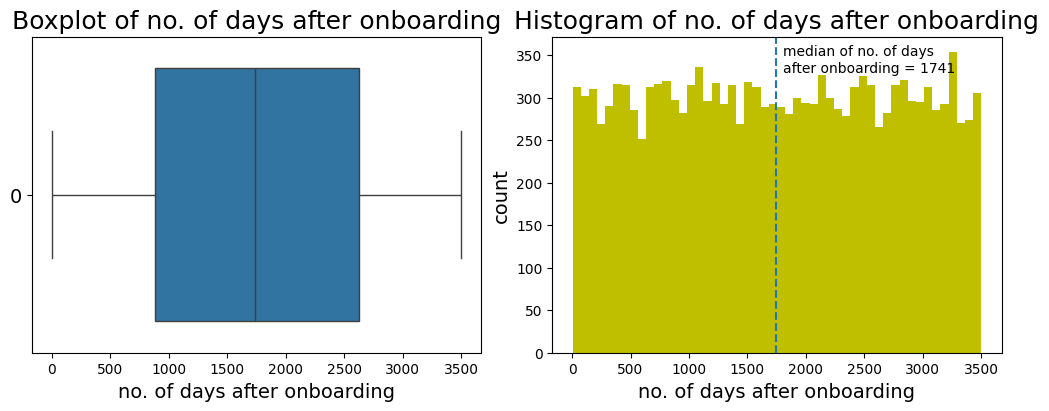

In [52]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4),constrained_layout = True)

ax1 = sns.boxplot(data=df,x='n_days_after_onboarding',ax=ax1)
ax1.set_xlabel("no. of days after onboarding",fontsize=14)
ax1.set_title('Boxplot of no. of days after onboarding',fontsize=18)
ax1.set_yticks(ax1.get_yticks())  # Ensure ticks are set first
ax1.set_yticklabels(ax1.get_yticks(),size=14)

median_onboard = np.median(df['n_days_after_onboarding'])
ax2 = plt.hist(df['n_days_after_onboarding'],bins=50,color='y')
plt.axvline(median_onboard,ls="--",label="Median hour")
plt.xlabel('no. of days after onboarding',fontsize=14)
plt.ylabel('count',fontsize=14)
plt.text(1800,350,'median of no. of days')
plt.text(1800,330,'after onboarding = 1741')
plt.title('Histogram of no. of days after onboarding',fontsize=18);

- Number of days since onboarding is a uniform distribution with values ranging from near-zero to ~3,500 (~9.5 years).

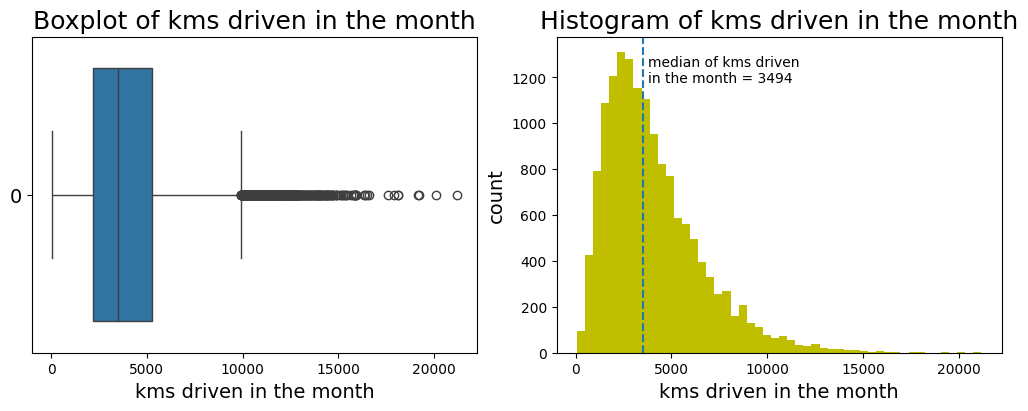

In [51]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4),constrained_layout = True)

ax1 = sns.boxplot(data=df,x='driven_km_drives',ax=ax1)
ax1.set_xlabel("kms driven in the month",fontsize=14)
ax1.set_title('Boxplot of kms driven in the month',fontsize=18)
ax1.set_yticks(ax1.get_yticks())
ax1.set_yticklabels(ax1.get_yticks(),size=14)

median_kms = np.median(df['driven_km_drives'])
ax2 = plt.hist(df['driven_km_drives'],bins=50,color='y')
plt.axvline(median_kms,ls="--",label="Median hour")
plt.xlabel('kms driven in the month',fontsize=14)
plt.ylabel('count',fontsize=14)
plt.text(3800,1250,'median of kms driven')
plt.text(3800,1180,'in the month = 3494')
plt.title('Histogram of kms driven in the month',fontsize=18);

- The number of drives driven in the last month per user is a right-skewed distribution with half the users driving under 3,495 kilometers. As you discovered in the analysis from the previous course, the users in this dataset drive a lot. The longest distance driven in the month was over half the circumferene of the earth.

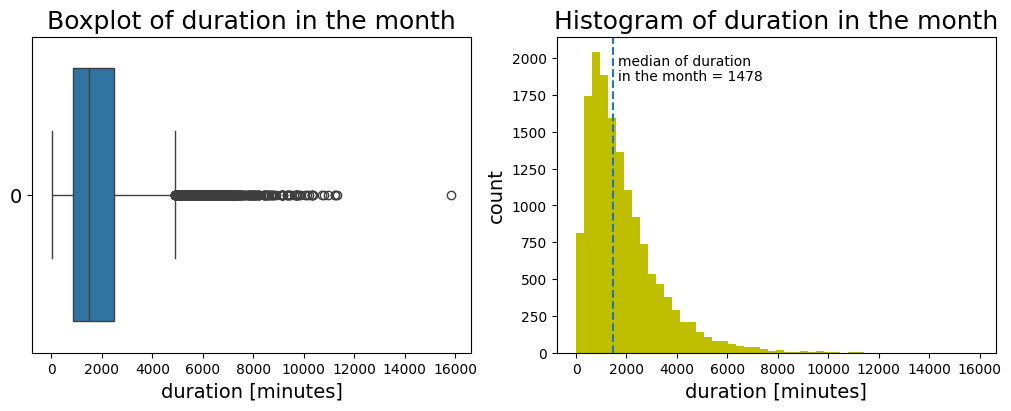

In [50]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4),constrained_layout = True)

ax1 = sns.boxplot(data=df,x='duration_minutes_drives',ax=ax1)
ax1.set_xlabel("duration [minutes]",fontsize=14)
ax1.set_title('Boxplot of duration in the month',fontsize=18)
ax1.set_yticks(ax1.get_yticks())
ax1.set_yticklabels(ax1.get_yticks(),size=14)

median_durmins = np.median(df['duration_minutes_drives'])
ax2 = plt.hist(df['duration_minutes_drives'],bins=50,color='y')
plt.axvline(median_durmins,ls="--",label="Median hour")
plt.xlabel('duration [minutes]',fontsize=14)
plt.ylabel('count',fontsize=14)
plt.text(1650,1950,'median of duration')
plt.text(1650,1850,'in the month = 1478')
plt.title('Histogram of duration in the month',fontsize=18);

- The duration_minutes_drives variable has a heavily skewed right tail. Half of the users drove less than ~1,478 minutes (~25 hours), but some users clocked over 250 hours over the month.

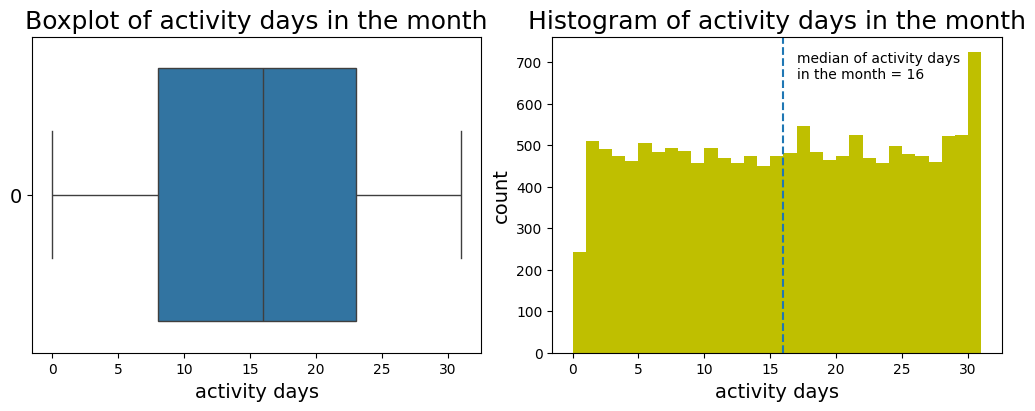

In [49]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4),constrained_layout = True)

ax1 = sns.boxplot(data=df,x='activity_days',ax=ax1)
ax1.set_xlabel("activity days",fontsize=14)
ax1.set_title('Boxplot of activity days in the month',fontsize=18)
ax1.set_yticks(ax1.get_yticks())
ax1.set_yticklabels(ax1.get_yticks(),size=14)

median_actdays = np.median(df['activity_days'])
ax2 = plt.hist(df['activity_days'],bins=31,color='y')
plt.axvline(median_actdays,ls="--",label="Median hour")
plt.xlabel('activity days',fontsize=14)
plt.ylabel('count',fontsize=14)
plt.text(17,700,'median of activity days')
plt.text(17,660,'in the month = 16')
plt.title('Histogram of activity days in the month',fontsize=18);

- Within the last month, users opened the app a median of 16 times. The box plot reveals a centered distribution. The histogram shows a nearly uniform distribution of ~500 people opening the app on each count of days. However, there are ~250 people who didn't open the app at all and ~250 people who opened the app every day of the month.

- This distribution is noteworthy because it does not mirror the sessions distribution, which you might think would be closely correlated with activity_days.

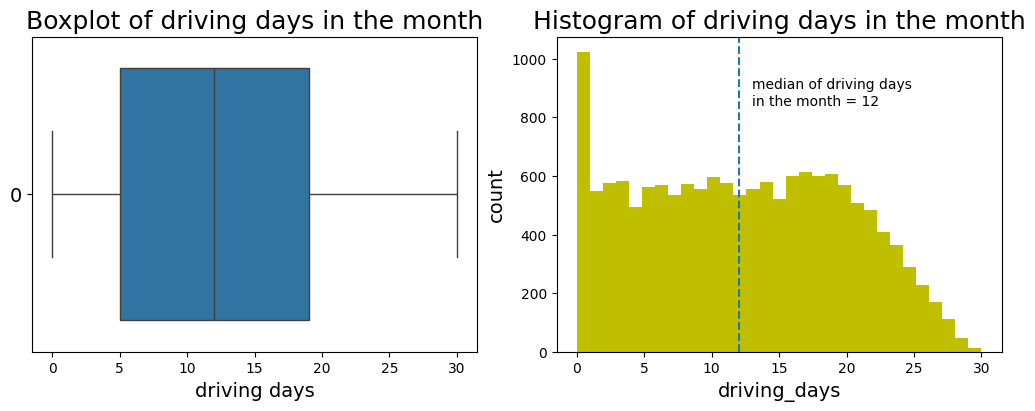

In [48]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4),constrained_layout = True)

ax1 = sns.boxplot(data=df,x='driving_days',ax=ax1)
ax1.set_xlabel("driving days",fontsize=14)
ax1.set_title('Boxplot of driving days in the month',fontsize=18)
ax1.set_yticks(ax1.get_yticks())
ax1.set_yticklabels(ax1.get_yticks(),size=14)

median_drdays = np.median(df['driving_days'])
ax2 = plt.hist(df['driving_days'],bins=31,color='y')
plt.axvline(median_drdays,ls="--",label="Median hour")
plt.xlabel('driving_days',fontsize=14)
plt.ylabel('count',fontsize=14)
plt.text(13,900,'median of driving days')
plt.text(13,840,'in the month = 12')
plt.title('Histogram of driving days in the month',fontsize=18);

- The number of days users drove each month is almost uniform, and it largely correlates with the number of days they opened the app that month, except the driving_days distribution tails off on the right.
However, there were almost twice as many users (~1,000 vs. ~550) who did not drive at all during the month. 

- This might seem counterintuitive when considered together with the information from activity_days. That variable had ~500 users opening the app on each of most of the day counts, but there were only ~250 users who did not open the app at all during the month and ~250 users who opened the app every day. Flag this for further investigation later.

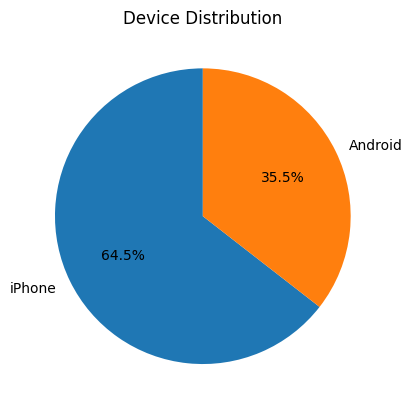

In [58]:
device_counts = df['device'].value_counts()
plt.figure()
device_counts.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Device Distribution')
plt.ylabel('')  # Hide the y-label
plt.show()

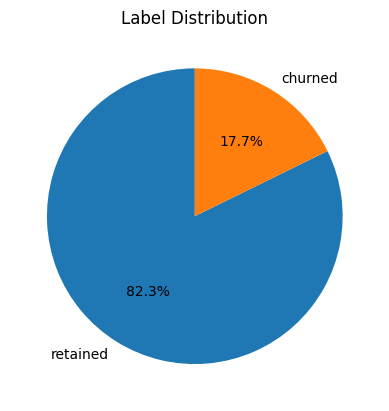

In [80]:
# Obtaining the number of labels.
label_number = df["label"].value_counts()
plt.figure()
label_number.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Label Distribution')
plt.ylabel('')  # Hide the y-label
plt.show()


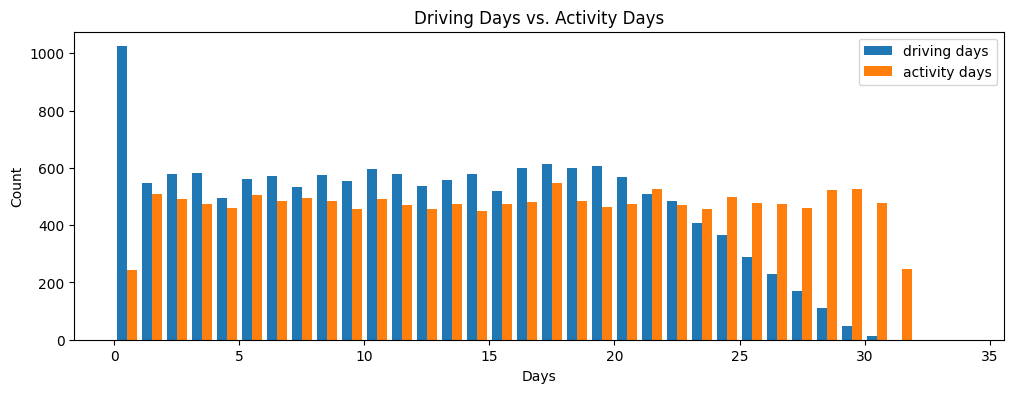

In [84]:
plt.figure(figsize = (12,4))

# Creating a label for both variables.
label = ["driving days", "activity days"]

# Histogram of the "driving days" and "activity_days" variables.
plt.hist( x = [df["driving_days"], df["activity_days"]], bins = range(0,35), label = label)

plt.xlabel("Days")
plt.ylabel("Count")
plt.legend()
plt.title("Driving Days vs. Activity Days")
plt.show()

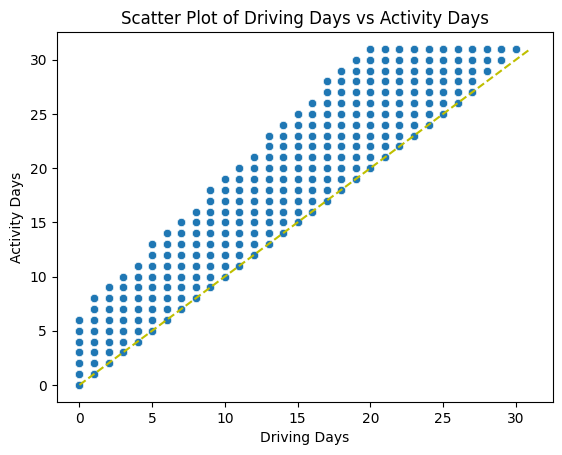

In [86]:
# Scatter plot of the variables "driving_days" and "activity_days".
sns.scatterplot(data=df, x = "driving_days", y = "activity_days")

plt.title("Scatter Plot of Driving Days vs Activity Days")
plt.xlabel("Driving Days")
plt.ylabel("Activity Days")
plt.plot([0,31],[0,31],color='y',linestyle='--');
plt.show()

- As observed previously, this might seem counterintuitive. After all, why are there fewer people who didn't use the app at all during the month and more people who didn't drive at all during the month?


- On the other hand, it could just be illustrative of the fact that, while these variables are related to each other, they're not the same. People probably just open the app more than they use the app to drive—perhaps to check drive times or route information, to update settings, or even just by mistake.


- Nonetheless, it might be worthwile to contact the data team at Waze to get more information about this, especially because it seems that the number of days in the month is not the same between variables.


- Notice that there is a theoretical limit. If you use the app to drive, then by definition it must count as a day-use as well. In other words, you cannot have more drive-days than activity-days. None of the samples in this data violate this rule, which is good.

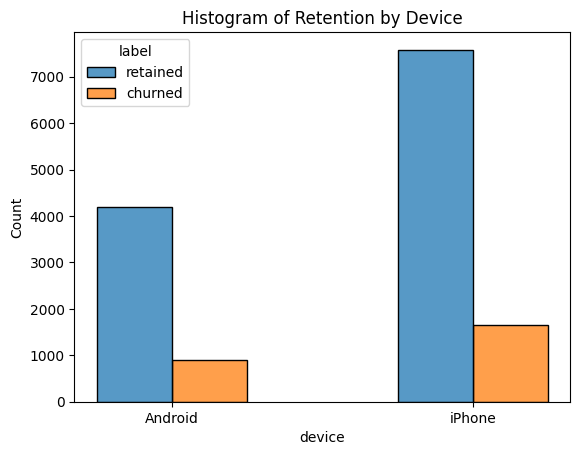

In [65]:
# Histogram of the "device" and "label" combination
sns.histplot(data = df, x = "device", hue = "label", multiple = "dodge", shrink = 0.5)

plt.title("Histogram of Retention by Device")
plt.show()

In [ ]:
df["km_per_driving_day"].describe()

c:\Users\NIMO\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


count    1.499900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.672804e+02
50%      3.231459e+02
75%      7.579257e+02
max               inf
Name: km_per_driving_day, dtype: float64

In [104]:
#Introducing new features
df["km_per_drive"] = df["driven_km_drives"] / df["drives"]

df["km_per_driving_day"] = df["driven_km_drives"] / df["driving_days"]

df["drives_per_driving_day"] = df["drives"] / df["driving_days"]

df['total_sessions_per_day'] = df['total_sessions'] / df['n_days_after_onboarding']

df['km_per_hour'] = df['driven_km_drives'] / (df['duration_minutes_drives'] / 60)

df["percent_sessions_in_last_month"] = df["sessions"] / df["total_sessions"]


In [102]:
# Converting infinite values to zero
df.loc[df["km_per_driving_day"] == np.inf, "km_per_driving_day"] = 0
df.loc[df['km_per_drive'] == np.inf, 'km_per_drive'] = 0

# Confirming that it worked
df["km_per_driving_day"].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64

-   Some of the variables contain outliers and most variables were right-skewed, while some exhibited uniform distribution but the data generally appeared to be of high quality, with no significant issues affecting variables like driven_km_drives.

In [105]:
outliers_cols = ["sessions", "drives", "total_navigations_fav2", "driven_km_drives", "duration_minutes_drives",
                 "total_sessions", "total_navigations_fav1", ]

def outliers(df, col):
    percentile = df[col].quantile(0.95)
    df.loc[df[col] > percentile, col] = percentile

    return df

for col in outliers_cols:
  df = outliers(df.copy(), col)

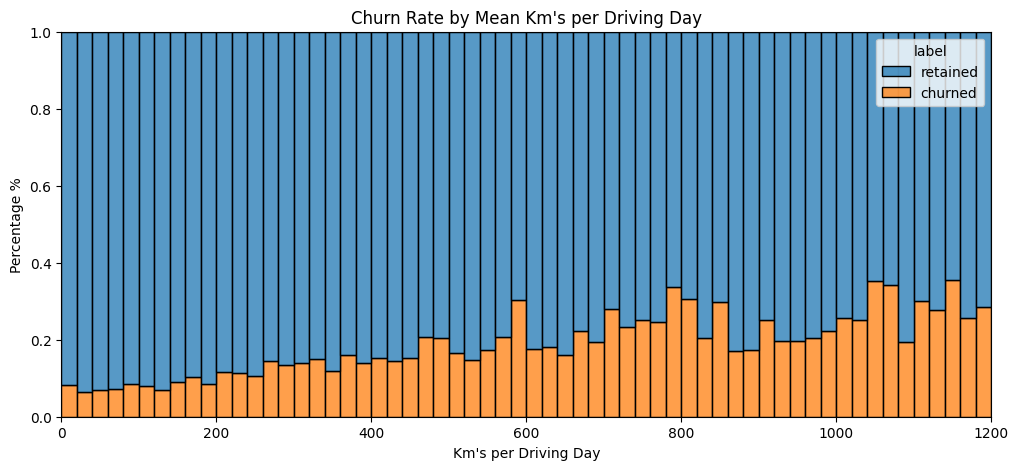

In [106]:
# Histogram of the new variable "km_per_driving_day" and the "label" variable.
plt.figure(figsize=(12,5))

sns.histplot(data = df, x = "km_per_driving_day", bins = range(0,1201,20), hue = "label", multiple = "fill")

plt.xlabel("Km's per Driving Day")
plt.ylabel("Percentage %")
plt.title("Churn Rate by Mean Km's per Driving Day")

plt.show()

- The churn rate tends to increase as the mean daily distance driven increases, confirming what was found in the previous course. It would be worth investigating further the reasons for long-distance users to discontinue using the app.

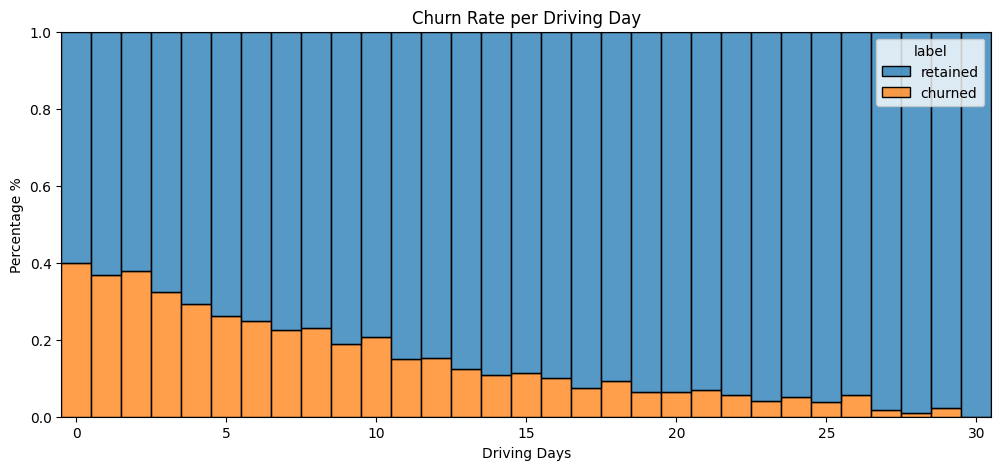

In [107]:
# Histogram of the variable "driving_days" and the "label" variable.
plt.figure(figsize=(12,5))

sns.histplot(data = df, x = "driving_days", bins = range(1,32), hue = "label", multiple = "fill", discrete = True)

plt.xlabel("Driving Days")
plt.ylabel("Percentage %")
plt.title("Churn Rate per Driving Day")

plt.show()

- The churn rate is highest for people who didn't use Waze much during the last month. The more times they used the app, the less likely they were to churn. While 40% of the users who didn't use the app at all last month churned, nobody who used the app 30 days churned.

- This isn't surprising. If people who used the app a lot churned, it would likely indicate dissatisfaction. When people who don't use the app churn, it might be the result of dissatisfaction in the past, or it might be indicative of a lesser need for a navigational app. Maybe they moved to a city with good public transportation and don't need to drive anymore.

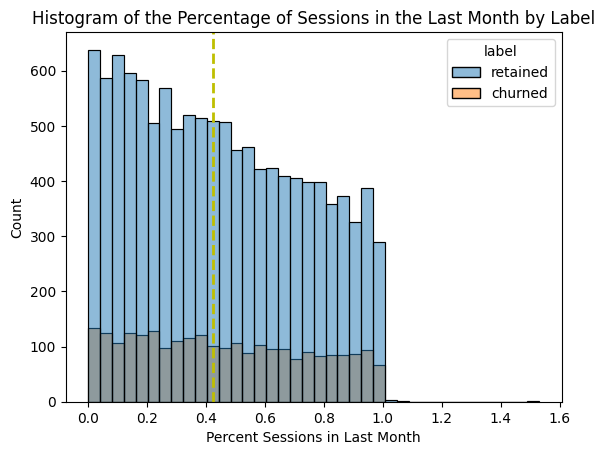

In [108]:
# Histogram of the "percent_sessions_in_last_month" variable.
sns.histplot(data=df, x = "percent_sessions_in_last_month", hue = df["label"], multiple = "layer")

# Assigning median calculation to use in the plot.
med_percent_sessions_in_last_month = df["percent_sessions_in_last_month"].median()

plt.axvline(x = med_percent_sessions_in_last_month, color = "y", linestyle = "dashed", linewidth = 2)
plt.title("Histogram of the Percentage of Sessions in the Last Month by Label")
plt.xlabel("Percent Sessions in Last Month")
plt.ylabel("Count")

plt.show()

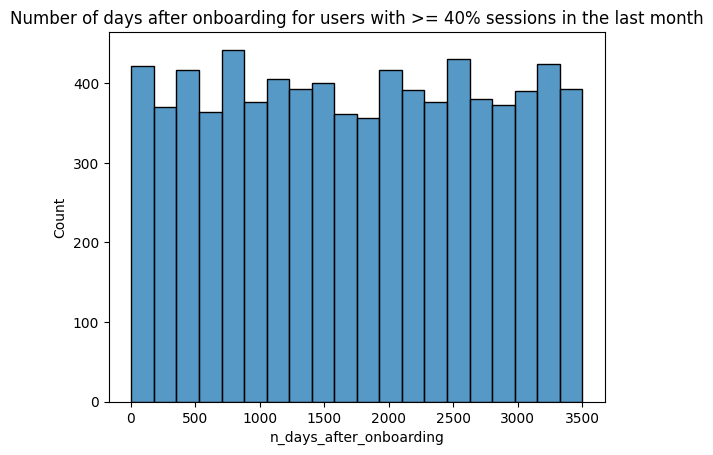

In [109]:
# Determining the percentage of people who had 40% or more of their sessions in the last month and assigning them to a new dataframe.
df_forty_percent_sessions_last_month = df.loc[df["percent_sessions_in_last_month"]>=0.4]

# Histogram of the "n_days_after_onboarding" variable just for the people who had 40% or more of their sessions in the last month.
sns.histplot(data=df, x = df_forty_percent_sessions_last_month["n_days_after_onboarding"])

plt.title("Number of days after onboarding for users with >= 40% sessions in the last month")
plt.show()

- The number of days since onboarding for users with 40% or more of their total sessions occurring in just the last month is a uniform distribution. This is very strange. It's worth asking Waze why so many long-time users suddenly used the app so much in the last month.

- Analysis revealed that the overall churn rate is ~17%, and that this rate is consistent between iPhone users and Android users.

- Perhaps you feel that the more deeply you explore the data, the more questions arise. This is not uncommon! In this case, it's worth asking the Waze data team why so many users used the app so much in just the last month.

- Also, EDA has revealed that users who drive very long distances on their driving days are more likely to churn, but users who drive more often are less likely to churn. The reason for this discrepancy is an opportunity for further investigation, and it would be something else to ask the Waze data team about.

- There is missing data in the user churn label, so we might need further data processing before further analysis.
There are many outlying observations for drives, so we might consider a variable transformation to stabilize the variation.
The number of drives and the number of sessions are both strongly correlated, so they might provide redundant information when we incorporate both in a model.
On average, retained users have fewer drives than churned users.

# Conclusion:
 
- What types of distributions did you notice in the variables? What did this tell you about the data?
Nearly all the variables were either very right-skewed or uniformly distributed. For the right-skewed distributions, this means that most users had values in the lower end of the range for that variable. For the uniform distributions, this means that users were generally equally likely to have values anywhere within the range for that variable.

- Was there anything that led you to believe the data was erroneous or problematic in any way?
Most of the data was not problematic, and there was no indication that any single variable was completely wrong. However, several variables had highly improbable or perhaps even impossible outlying values, such as driven_km_drives. Some of the monthly variables also might be problematic, such as activity_days and driving_days, because one has a max value of 31 while the other has a max value of 30, indicating that data collection might not have occurred in the same month for both of these variables.

- Did your investigation give rise to further questions that you would like to explore or ask the Waze team about?
Yes. I'd want to ask the Waze data team to confirm that the monthly variables were collected during the same month, given the fact that some have max values of 30 days while others have 31 days. I'd also want to learn why so many long-time users suddenly started using the app so much in just the last month. Was there anything that changed in the last month that might prompt this kind of behavior?

- What percentage of users churned and what percentage were retained?
Less than 18% of users churned, and ~82% were retained.

- What factors correlated with user churn? How?
Distance driven per driving day had a positive correlation with user churn. The farther a user drove on each driving day, the more likely they were to churn. On the other hand, number of driving days had a negative correlation with churn. Users who drove more days of the last month were less likely to churn.

- Did newer uses have greater representation in this dataset than users with longer tenure? How do you know?
No. Users of all tenures from brand new to ~10 years were relatively evenly represented in the data. This is borne out by the histogram for n_days_after_onboarding, which reveals a uniform distribution for this variable.

In [87]:
# Create `professional_driver` column
df['professional_driver'] = np.where((df['drives'] >= 60) & (df['driving_days'] >= 15), 1, 0)

In [88]:
# Creating a new column for "monthly_drives_per_session_ratio".
df["monthly_drives_per_session_ratio"] = (df["drives"]/df["sessions"])

# Viewing the dataframe's first 10 rows.
df.head(10)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_drive,km_per_driving_day,drives_per_driving_day,percent_sessions_in_last_month,monthly_drives_per_session_ratio,professional_driver
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,11.632058,138.360267,11.894737,0.953670,0.798587,1
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone,128.186173,1246.901868,9.727273,0.406856,0.804511,0
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,32.201567,382.393602,11.875000,0.841186,0.833333,0
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,22.839778,304.530374,13.333333,0.724968,0.816327,0
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,58.091206,219.455667,3.777778,0.499266,0.809524,1
5,5,retained,113,103,279.544437,2637,0,0,901.238699,439.101397,15,11,iPhone,8.749890,81.930791,9.363636,0.404229,0.911504,0
6,6,retained,3,2,236.725314,360,185,18,5249.172828,726.577205,28,23,iPhone,2624.586414,228.224906,0.086957,0.012673,0.666667,0
7,7,retained,39,35,176.072845,2999,0,0,7892.052468,2466.981741,22,20,iPhone,225.487213,394.602623,1.750000,0.221499,0.897436,0
8,8,retained,57,46,183.532018,424,0,26,2651.709764,1594.342984,25,20,Android,57.645864,132.585488,2.300000,0.310573,0.807018,0
9,9,churned,84,68,244.802115,2997,72,0,6043.460295,2341.838528,7,3,iPhone,88.874416,2014.486765,22.666667,0.343134,0.809524,0


In [89]:
test=df[df['label'].isna()]

In [90]:
train=df[~df['label'].isna()]

In [91]:
train.shape

(14299, 19)

In [92]:
test.shape

(700, 19)

In [93]:
df.columns

Index(['ID', 'label', 'sessions', 'drives', 'total_sessions',
       'n_days_after_onboarding', 'total_navigations_fav1',
       'total_navigations_fav2', 'driven_km_drives', 'duration_minutes_drives',
       'activity_days', 'driving_days', 'device', 'km_per_drive',
       'km_per_driving_day', 'drives_per_driving_day',
       'percent_sessions_in_last_month', 'monthly_drives_per_session_ratio',
       'professional_driver'],
      dtype='object')

In [94]:
map_dictionary = {'Android': 2, 'iPhone': 1}

# 2. Create new `device_type` column
df['device_type'] = df['device']

# 3. Map the new column to the dictionary
df['device_type'] = df['device_type'].map(map_dictionary)

df['device_type'].head()

0    2
1    1
2    2
3    1
4    2
Name: device_type, dtype: int64

In [95]:
test=df[df['label'].isna()]
train=df[~df['label'].isna()]

# Hypothesis Testing (A/B testing):

You will conduct hypothesis testing on the data for the churn data. The data team has asked you to investigate Waze's dataset to determine which hypothesis testing method best serves the data and the churn project.

In [97]:
from scipy import stats

# Hypothesis testing:

- Your goal is to conduct a two-sample t-test. Recall the steps for conducting a hypothesis test:

1.State the null hypothesis and the alternative hypothesis

2.Choose a signficance level

3.Find the p-value

4.Reject or fail to reject the null hypothesis

Note: This is a t-test for two independent samples. This is the appropriate test since the two groups are independent (Android users vs. iPhone users).

1. Clasify the Hypotheses

    H0: There is no difference in average number of drives between drivers who use iPhone devices and drivers who use Androids.

    HA: There is a difference in average number of drives between drivers who use iPhone devices and drivers who use Androids.

2. Significance level
Next, choose 5% as the significance level and proceed with a two-sample t-test.

3. Calculate the p-value

In [98]:
# 1. Isolate the `drives` column for iPhone users.
iPhone = train[train['device_type'] == 1]['drives']

# 2. Isolate the `drives` column for Android users.
Android = train[train['device_type'] == 2]['drives']

# 3. Perform the t-test
stats.ttest_ind(a=iPhone, b=Android, equal_var=False)

TtestResult(statistic=1.676594122141587, pvalue=0.09365074661708836, df=10826.925404660755)

Reject or fail to reject the null hypothesis

- Since the p-value is larger than the chosen significance level (5%), you fail to reject the null hypothesis. There is not a statistically significant difference in the average number of drives between drivers who use iPhones and drivers who use Androids.

In [99]:
# fail to reject the null hypothesis

In [25]:
train['labels']=train['label'].map({'retained':0,'churned':1})
 

C:\Users\NIMO\AppData\Local\Temp\ipykernel_7952\1188876424.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['labels']=train['label'].map({'retained':0,'churned':1})


# Collinearity

Check the correlation among predictor variables. First, generate a correlation matrix.

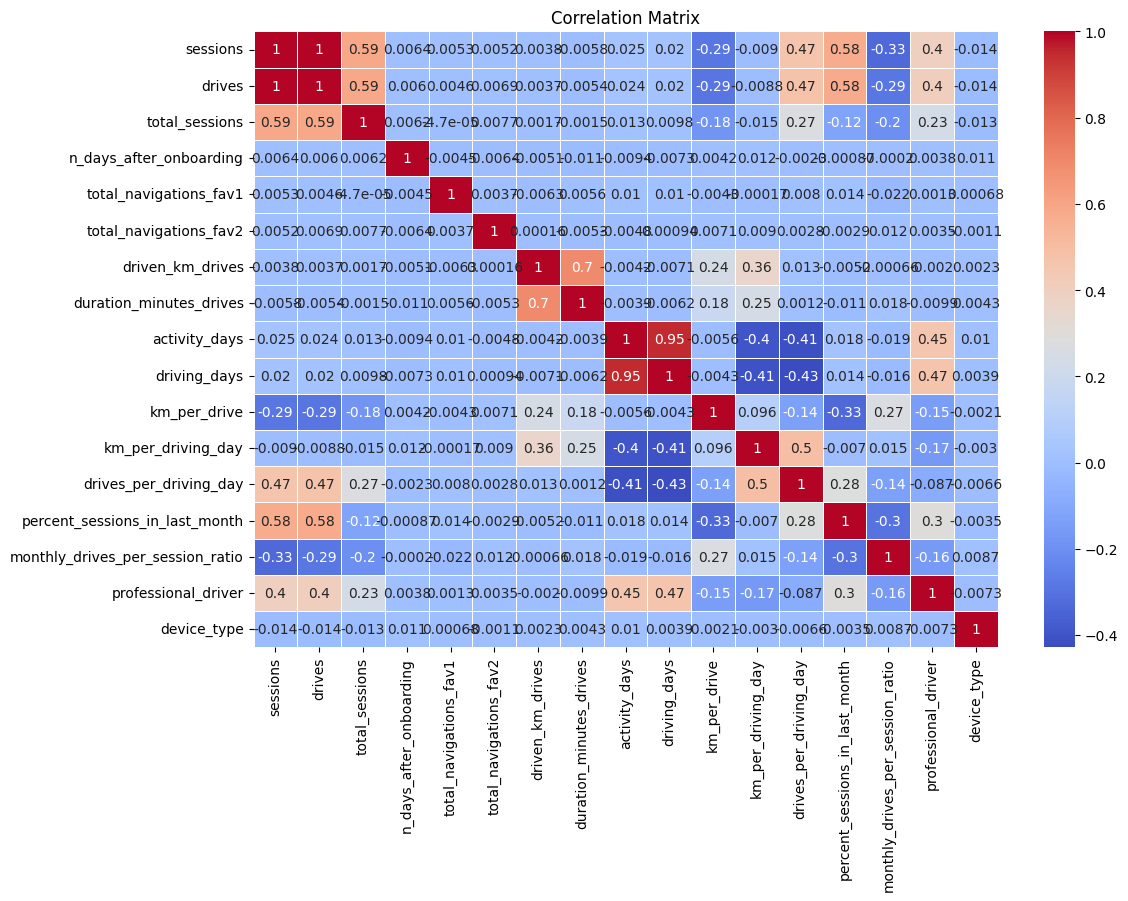

In [100]:
plt.figure(figsize=(12, 8))
corr_matrix = train.drop(['ID','label','device'],axis=1).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()
